<a href="https://colab.research.google.com/github/ThanhVanLe0605/Data-Mining-For-Business-Analytics-In-Python/blob/main/Chapter_10_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOGISTIC REGRESSION


[LOGISTIC REGRESSION OVERVIEW](https://colab.research.google.com/drive/1rhDM8FPZFLhMkj6Yo0xeRjnCvGXI_pf3#scrollTo=1WUkAZJzubtP&line=1&uniqifier=1)

10.1. [INTRODUCTION](https://colab.research.google.com/drive/1rhDM8FPZFLhMkj6Yo0xeRjnCvGXI_pf3#scrollTo=eMDc_ZO-xgni&line=1&uniqifier=1)

10.2. [Logistic Regression: The Math Behind the model](https://colab.research.google.com/drive/1rhDM8FPZFLhMkj6Yo0xeRjnCvGXI_pf3#scrollTo=T6PKwUll25Ec&line=1&uniqifier=1)

10.3. [Example: Acceptance of Personal Loan](https://colab.research.google.com/drive/1rhDM8FPZFLhMkj6Yo0xeRjnCvGXI_pf3#scrollTo=mT1o6tNJ7PEc&line=68&uniqifier=1)

10.4. [Evaluating Classification Performance](https://colab.research.google.com/drive/1rhDM8FPZFLhMkj6Yo0xeRjnCvGXI_pf3#scrollTo=fQLDXLQIFid_&line=46&uniqifier=1)

10.5. [Multi-class Logistic Regression](https://colab.research.google.com/drive/1rhDM8FPZFLhMkj6Yo0xeRjnCvGXI_pf3#scrollTo=4jTDgoJHHQf8&line=1&uniqifier=1)

## LOGISTIC REGRESSION OVERVIEW


This section introduces **Logistic Regression**, a highly popular and powerful method used for classification tasks.

* **Methodology & Setup**
    * It models the relationship between **predictors** and a specific **outcome**, similar to linear regression.
    * Users must explicitly specify predictors and their forms (e.g., interaction terms).

* **Key Advantages**
    * a. Effective even on **small datasets**.
    * b. **Computationally efficient**: Once the model is estimated, classifying large samples of new records is fast and cheap.

* **Core Concepts & Estimation**
    * Focuses on model formulation and estimation from data.
    * Explains the fundamental relations between **"logit"**, **"odds"**, and **"probability"** of an event.

* **Advanced Topics**
    * a. **Variable importance** and **coefficient interpretation**.
    * b. **Variable selection** techniques for **dimension reduction**.
    * c. Extensions to **multi-class classification** problems.

### Python

In this chapter, we will use `pandas` for data handling, `scikit-learn` and `statsmodels` for the models, and `matplotlib` for visualization. We will also make use of the utility functions from the Python Utilities Functions Appendix. Use the following import statements for the Python code in this chapter.

```python
# import required functionality for this chapter

In [12]:
# import required functionality for this chapter
!pip install mord dmba
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pyplot as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

## 10.1. INTRODUCTION






This section details the scope, application, and mechanics of the Logistic Regression model.

* **Core Concept & Application**
    * a. **Purpose**: Extends linear regression to handle **categorical outcomes** (classes) rather than continuous values.
    * b. **Primary Uses**:
        * **Classification**: Predicting the class of a new record based on predictors.
        * **Profiling**: Identifying factors that distinguish between classes in known data.
    * c. **Target Variable**: Focuses primarily on **binary outcomes** (e.g., Success/Failure, 0/1). Continuous variables are sometimes converted (binned) into binary classes for simplification.

* **Mechanism: Propensities and Cutoffs**
    Logistic regression operates in two distinct steps to classify records:
    * a. **Step 1: Estimation**: The model calculates the **propensity** (or probability) that a record belongs to the class of interest, denoted as p= (Y=1).
    * b. **Step 2: Classification via Cutoff**:
        * A **cutoff value** is applied to the estimated probabilities to assign classes.
        * **Standard Rule**: Typically, if $P(Y=1) \ge 0.5$, the record is classified as Class 1.
        * **Adjustments**: For rare but critical events (e.g., fraud), the cutoff may be lowered to capture more Class 1 cases.

## 10.2. Logistic Regression: The Math Behind the model:




This section explains the mathematical formulation linking predictors to the probability of an outcome.

* **The Limitation of Linear Regression**
    * Standard linear regression cannot be used directly for classification because it may predict values outside the required probability range of [0, 1].
    * **Solution**: Use a nonlinear function (Logistic Response Function) to ensure predictions stay within [0, 1].

* **Key Concepts & Relationships**
    * a. **Probability ($p$)**:
        * The probability of belonging to class 1: p = P(Y=1).
        * **Range**: [0, 1].
        * **Formula**: p = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_q x_q)}}
    * b. **Odds**:
        * The ratio of the probability of the event happening to it *not* happening.
        * **Formula**: $\text{Odds}(Y=1) = \frac{p}{1-p}$
        * **Range**: $[0, \infty)$ (from 0 to infinity).
        * **Relationship with predictors**: Multiplicative (exponential).
    * c. **Logit (Log-Odds)**:
        * The natural logarithm of the odds.
        * **Formula**: $\text{logit} = \log(\text{Odds}) = \beta_0 + \beta_1 x_1 + \dots + \beta_q x_q$
        * **Range**: $(-\infty, +\infty)$.
        * **Relationship with predictors**: **Linear**. This allows us to use linear regression techniques to estimate the coefficients.

* **Summary of Transformation Steps**
    1.  Predictors ($X$) $\rightarrow$ Linear Equation $\rightarrow$ **Logit**
    2.  **Logit** $\rightarrow$ Exponentiation ($e^{logit}$) $\rightarrow$ **Odds**
    3.  **Odds** $\rightarrow$ Mapping ($\frac{Odds}{1+Odds}$) $\rightarrow$ **Probability ($p$)**

## 10.3 Example: Acceptance of Personal Loan
Logistic Regression: Personal Loan Acceptance Case Study

###**1. Context & Problem Definition**

a. **Data Context:** The Universal Bank dataset contains 5000 customer records.

b. **Target Variable ($Y$):** `Personal Loan` (Binary: Did the customer accept the loan offer in the last campaign?).(

c. **Statistics:** Only 480 customers (9.6%) accepted the loan (imbalanced classes).

d. **Objective:** Build a **classification model** to identify customers most likely to accept a loan offer in future campaigns.

---

###**2. Model with a Single Predictor**

a. **Concept:** Similar to simple linear regression, but the outcome variable $Y$ is categorical.

b. **Predictor ($X$):** Using `Income` to classify customers.

c. **Probability Formula ($P$):** The probability of accepting a loan given income $x$ is calculated using the Logistic function (Sigmoid):
   $$P(Personal Loan = Yes | Income = x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}$$

d. **Odds Formula:**
   $$\text{Odds}(Personal Loan = Yes | Income = x) = e^{\beta_0 + \beta_1 x}$$


e. **Classification Mechanism:**
   - The model outputs a probability $p$ between 0 and 1.
   - A **cutoff value** is applied to classify the result as 1 (Accept) or 0 (Reject). If $p > \text{cutoff}$, predict 1.


---

###**3. Estimating the Model (MLE vs. Least Squares)**

a. **Methodology:** Unlike Linear Regression which uses *Least Squares*, Logistic Regression uses **Maximum Likelihood Estimation (MLE)**.

b. **Reasoning:** The relationship between the target $Y$ and parameters $\beta$ is non-linear.

c. **MLE Principle:** Finds the parameters that maximize the chance (likelihood) of obtaining the observed data.


---


###**4. Data Preprocessing**

a. **Categorical Variables:**
   - Variables like `Education` (levels 1, 2, 3) must be converted into **dummy variables** (one-hot encoding).
   - **Multicollinearity Note:** To avoid perfect multicollinearity, keep only $k-1$ dummy variables for $k$ categories.
b. **Data Splitting:**
   - **Training set:** 60% (for model fitting).
   - **Validation set:** 40% (for performance evaluation).


---

###**5. Estimated Model & Logit Equation**

a. **The Logit:** The natural logarithm of Odds ($ln(Odds)$). It has a **linear relationship** with the predictors, allowing us to see the additive effect of variables.

b. **Estimated Equation (12 Predictors):**
   $$
   \begin{aligned}
   \text{Logit}(Personal Loan = Yes) = & -12.619 - 0.0325(\text{Age}) + 0.0342(\text{Experience}) \\
   & + 0.0588(\text{Income}) + 0.6141(\text{Family}) + 0.2405(\text{CCAvg}) \\
   & + 0.0010(\text{Mortgage}) - 1.0262(\text{Securities\_Account}) \\
   & + 3.6479(\text{CD\_Account}) - 0.6779(\text{Online}) - 0.9560(\text{Credit Card}) \\
   & + 4.1922(\text{Education\_Graduate}) \\
   & + 4.3417(\text{Education\_Advanced/Professional})
   \end{aligned}
   $$
c. **Interpretation:**
   - **Positive coefficients** (e.g., `Income`, `CD_Account`) increase the probability of loan acceptance.
   - **Negative coefficients** (e.g., `Credit Card`, `Online`) decrease the probability.


---

###**6. Interpreting Results via Odds Ratios**

a. **Odds Ratio Formula:**
   $$\text{Odds Ratio} = e^{\beta_1}$$
b. **Meaning:** $e^{\beta_1}$ is the multiplicative factor impact on the Odds when $X_1$ increases by 1 unit (holding other variables constant).
   - If $\beta_1 > 0$: $e^{\beta_1} > 1$ (Odds increase).
   - If $\beta_1 < 0$: $e^{\beta_1} < 1$ (Odds decrease).
c. **Examples:**
   - **Income ($\beta \approx 0.036$):** A 1-unit increase in Income increases the odds of acceptance by a factor of $e^{0.036}$.
   - **CD_Account ($\beta \approx 3.65$):** Customers with a CD Account have odds of acceptance approx. **38.4 times** ($e^{3.65}$) higher than those without.

## 10.4 Evaluating Classification Performance

### 1. Evaluating Classification Performance
To assess how well a Logistic Regression model performs, we use several metrics and visualizations beyond simple accuracy.

* **Key Metrics:**
    * **Confusion Matrix:** A table showing True Positives, True Negatives, False Positives, and False Negatives.
    * **Accuracy:** The overall percentage of correct predictions.
    * **Ranking Goal:** In many business cases (e.g., credit scoring), ranking customers by their probability of belonging to a class is more important than just classifying them.

* **Visualizations:**
    * **Gains Chart & Lift Chart:** These evaluate the model's ability to identify targets compared to random selection.
        * *Interpretation:* A "Lift" implies how much better the model is at identifying the target class compared to a naive baseline. For example, the top 10% of customers identified by the model might contain 7.8 times more actual responders than a random 10% sample.

---

### 2. Interpreting Model Output
Understanding the relationship between predictors and the outcome is crucial.

* **Coefficients ($\beta$):** Represent the change in the **Logit** (log-odds) for a one-unit increase in the predictor.
    * Positive $\beta$: Increases the probability of the event.
    * Negative $\beta$: Decreases the probability of the event.
* **Odds Ratios (O.R. = $e^{\beta}$):** A more intuitive measure.
    * *Interpretation:* If O.R. = 1.05, it means a one-unit increase in the predictor increases the odds of the event by 5%.
    * If O.R. > 1: Positive relationship.
    * If O.R. < 1: Negative relationship.
* **P-values:** Determine statistical significance. A low p-value (typically < 0.05) indicates the predictor is significantly related to the outcome (e.g., *Income* and *Education* in the bank loan example).

---

### 3. Variable Selection & Model Validation
Finding the right balance between model simplicity (parsimony) and accuracy.

* **Selection Methods:**
    * **Automated Heuristics:** Stepwise, Forward Selection, and Backward Elimination (often minimizing **AIC**).
    * **Regularization:** Using **L1 (Lasso)** or **L2 (Ridge)** penalties to prevent overfitting. In Python, this is controlled by the `C` parameter (inverse of regularization strength).
    * **Interaction Terms:** Adding terms like $Income \times Family$   if variables have combined effects.

* **Profiling via Deciles:**
    * Analyzing the characteristics of the "Top Decile" (top 10% highest probability) vs. the overall average helps build a profile of the target audience (e.g., "Targets have higher income and education").

* **CRITICAL NOTE: The Danger of "Overly Optimistic" Performance**
    * **The Issue:** Relying solely on **Validation Data** for performance evaluation can be misleading. Since validation data is used to *select* the best model (tuning), the model implicitly "learns" the specific noise of the validation set.
    * **The Solution:** Always reserve a separate **Test Set** (Unseen Data) that is never used during the training or model selection process. This provides an unbiased estimate of how the model will perform in the real world.



## 10.5  Multi-class Logistic Regression


When the target variable has more than two classes ($m > 2$), the binary logistic model is extended. Since the sum of probabilities must equal 1, we estimate $m-1$ probabilities.

### 1. Ordinal Classes (Ordered Categories)
Used when classes have a meaningful order (e.g., *Buy, Hold, Sell* or *Low, Medium, High*). The method is often called **Cumulative Logit** or **Proportional Odds**.

* **Key Concept:** Model the cumulative probability $P(Y \le j)$.
* **Assumption:** The predictors have the **same slope ($\beta$)** across all class levels, but different intercepts ($\alpha$).

**Formulas (Example with $m=3$ classes):**
The logit functions for the cumulative probabilities are:
$$
\text{logit}(Y \le 1) = \ln \left( \frac{P(Y \le 1)}{1 - P(Y \le 1)} \right) = \alpha_0 + \beta_1 x
$$
$$
\text{logit}(Y \le 2) = \ln \left( \frac{P(Y \le 2)}{1 - P(Y \le 2)} \right) = \beta_0 + \beta_1 x
$$

**Recovering Probabilities:**
$$
P(Y=1) = \frac{1}{1 + e^{-(\alpha_0 + \beta_1 x)}}
$$


$$
P(Y=2) = P(Y \le 2) - P(Y \le 1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}} - P(Y=1)
$$




$$
P(Y=3) = 1 - P(Y \le 2)
$$

---

### 2. Nominal Classes (Unordered Categories)
Used when classes have no intrinsic order (e.g., *Brand A, Brand B, Brand C*). We use **Multinomial Logistic Regression**.

* **Key Concept:** Select one class as the **Reference Class** (e.g., Class C). Model the log-odds of membership in other classes relative to the reference.
* **Assumption:** Each class comparison has its **own unique set of coefficients** (different slopes and intercepts).

**Formulas (Example with Reference = C):**
The "pseudo-logit" equations are:
$$
\text{logit}(A) = \ln \left( \frac{P(Y=A)}{P(Y=C)} \right) = \alpha_0 + \alpha_1 x
$$
$$
\text{logit}(B) = \ln \left( \frac{P(Y=B)}{P(Y=C)} \right) = \beta_0 + \beta_1 x
$$

**Recovering Probabilities (Softmax):**
$$
P(Y=A) = \frac{e^{\alpha_0 + \alpha_1 x}}{1 + e^{\alpha_0 + \alpha_1 x} + e^{\beta_0 + \beta_1 x}}
$$
$$
P(Y=B) = \frac{e^{\beta_0 + \beta_1 x}}{1 + e^{\alpha_0 + \alpha_1 x} + e^{\beta_0 + \beta_1 x}}
$$
$$
P(Y=C) = 1 - P(Y=A) - P(Y=B)
$$



### Summary Table: Ordinal vs. Nominal

| Feature | Ordinal Logistic Regression | Nominal Logistic Regression |
| :--- | :--- | :--- |
| **Use Case** | Ranked data (Severity, Ratings) | Unordered data (Brands, Types) |
| **Slopes ($\beta$)** | **Shared** (Parallel lines assumption) | **Separate** for each class |
| **Intercepts ($\alpha$)** | Separate | Separate |
| **Complexity** | More parsimonious (fewer parameters) | More complex (more parameters) |

## 10.6. Example of complete analysis: predicting delayed flights



Predicting flight delays can be useful to a variety of organizations: airport authorities, airlines, aviation authorities.

* *Airport authorities*: Organizations that manage and operate a specific airport.

   Ex: Tan Son Nhat International Airport is managed by the Airports Corporation of Vietnam (ACV), which acts as the airport authority.

* *Airlines*: Companies that operate aircraft to transport passengers or cargo.

   Ex: Vietnam Airlines perate daily international and domestic flights from Tan Son Nhat Airport.

* *Aviation authorities*: national or international bodies responsible for regulating aviation safety, licensing, and industry standards.
   Ex: FAA, EASA(EU), CAAV

At times, joint task forces have been formed to address the problem. Such an organixation, if it were o provide ongoing real-time assistance with flight delays, would benefit from some advance notice about flights likely to be delayed.

* In this simplified illustration, we look at six predictors (see Table 10.6). The outcome of interest is whether the flight is delayed or not (**delayed** means more than 15 miniutes late). Our data consist of all flights from the Washington, DC area into the New York City area during January 2004. The percent of delayed flights among these 2201 flights is 19.5%. The data were obtained from the Bureau of Transportation Statistics website (www.transtats.bts.gov).


**TABLE 10.6 DESCRIPTION OF PREDICTORS FOR FLIGHT DELAYS EXAMPLE**

In [13]:
des_predictors = pd.read_excel("TABLE_10.6_DESCRIPTION_OF_PREDICTORS_FOR_FLIGHT_DALAYS_EXAMPLE.xlsx", header = None)
pd.set_option('display.max_colwidth', None)
display(des_predictors)

,0,1
0,Day of week,"Coded as 1 = Monday, 2 = Tuesday ,… , 7 = Sunday"
1,Departure time,Broken down into 18 intervals between 6:00 AM and 10:00 PM
2,Origin,"Three airport codes: DCA (Reagan National), IAD (Dulles), BWI(Baltimore-Washington Int'l)"
3,Destination,"Three airport codes: JFK (Kennedy), LGA(LaGuardia), EWR(Newark)"
4,Carrier,"Eight airline codes: CO( Continental), DH( Atlantic Coast), DL(Delta), MQ(American Eagle), OH(Comair), RU(Continental Express), UA(United), and US(USAirways)"
5,Weather,Coded as 1 if there was a weather-related delay


The goal is to predict accurately whether a new filght , not in this dataset, will be delayed or not. The outcome variable is a variable called Flight Status, coded as *delayed* or *ontime*.

Other information available on the website, such as distance and arrival time, is irrelevant because we are looking at a certain route (distance, flight time, etc. should be approximately equal for all flights in the data). A sample of the data for 20 flights is shown in Table 10.7. Figures 10.4 and 10.5 show visualizations of the relationships between flight deplays and different predictors or combinations of predictors.


In [14]:
flight_delays_df = pd.read_csv('/content/FlightDelays.csv')
display(flight_delays_df.head())

,schedtime,carrier,deptime,dest,distance,date,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
0,1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,ontime


**TABLE 10.7. SAMPLE 20 FLIGHTS**

In [15]:
delays_df = flight_delays_df[['delay', 'carrier', 'dayweek', 'deptime', 'dest', 'origin','weather']]
delays_df.head(20)

,delay,carrier,dayweek,deptime,dest,origin,weather
0,ontime,OH,4,1455,JFK,BWI,0
1,ontime,DH,4,1640,JFK,DCA,0
2,ontime,DH,4,1245,LGA,IAD,0
3,ontime,DH,4,1709,LGA,IAD,0
4,ontime,DH,4,1035,LGA,IAD,0
5,ontime,DH,4,839,JFK,IAD,0
6,ontime,DH,4,1243,JFK,IAD,0
7,ontime,DH,4,1644,JFK,IAD,0
8,ontime,DH,4,1710,JFK,IAD,0
9,ontime,DH,4,2129,JFK,IAD,0


**FIGURE 10.4 PROPORTION OF DELAYED FLIGHTS BY EACH OF THE SIX  PREDICTORS. TIME OF DAY IS DIVIDED INTO HOURLY BINS**

/tmp/ipython-input-1353269397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays_df['delay'] = [ 1 if x == 'delayed' else 0 for x in delays_df['delay']]


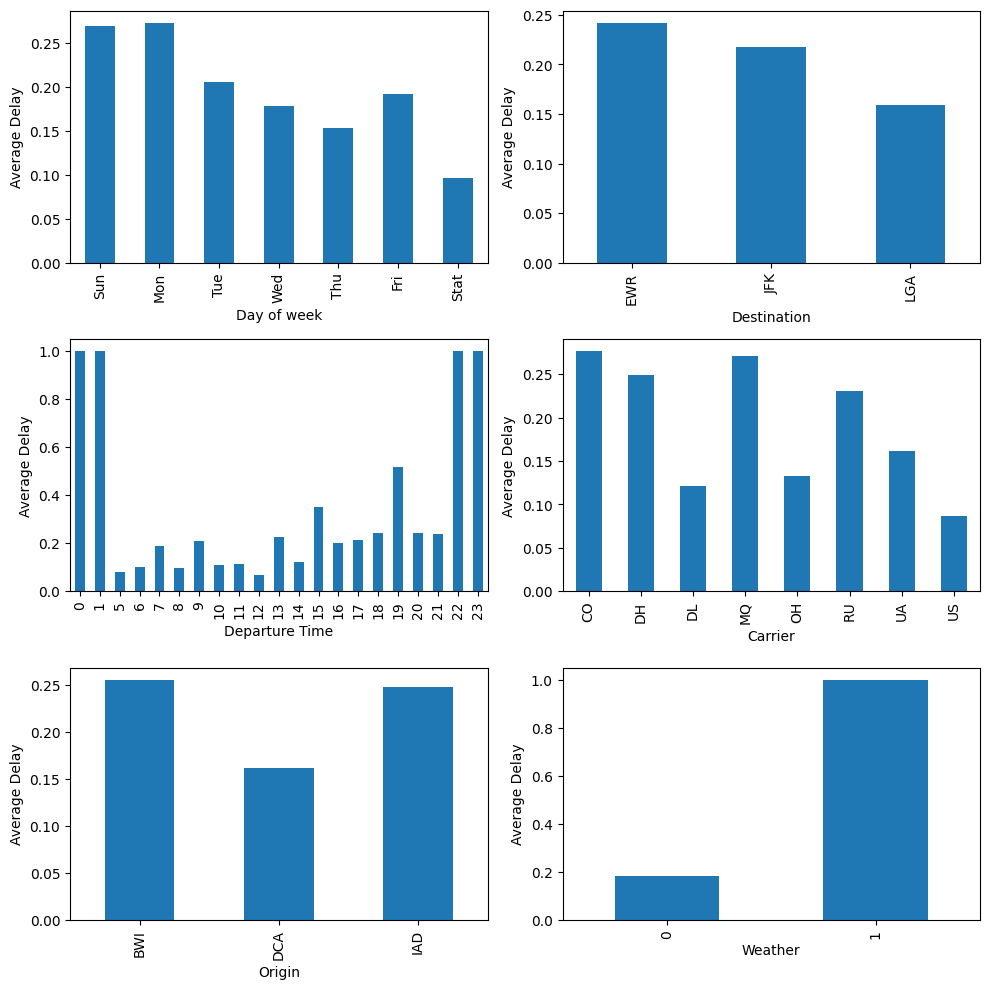

In [16]:
delays_df = flight_delays_df[['delay', 'carrier', 'dayweek', 'deptime', 'dest', 'origin','weather']]

# Create an indicator variable
delays_df['delay'] = [ 1 if x == 'delayed' else 0 for x in delays_df['delay']]

def createGraph(group, xlabel, axis):
  groupAverage = delays_df.groupby([group])['delay'].mean()
  if group == 'dayweek' : #rotate so that display starts on Sunday
      groupAverage = groupAverage.reindex(index = np.roll(groupAverage.index, 1))
      groupAverage.index = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Stat']
  ax = groupAverage.plot.bar(color = 'C0', ax = axis)
  ax.set_ylabel('Average Delay')
  ax.set_xlabel(xlabel)
  return ax

def graphDepartureTime(xlabel, axis):
  temp_df = pd.DataFrame({
      'CRS_DEP_TIME': delays_df['deptime'] // 100,
      'isDelayed'   : delays_df['delay']
  })
  groupAverage = temp_df.groupby(['CRS_DEP_TIME'])['isDelayed'].mean()
  ax = groupAverage.plot.bar(color = 'C0', ax = axis)
  ax.set_xlabel(xlabel)
  ax.set_ylabel('Average Delay')

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 10))

createGraph('dayweek', 'Day of week', axis = axes[0][0])
createGraph('dest', 'Destination', axis = axes[0][1])
graphDepartureTime('Departure Time', axis = axes[1][0])
createGraph('carrier', 'Carrier', axis = axes[1][1])
createGraph('origin', 'Origin', axis = axes[2][0])
createGraph('weather', 'Weather', axis = axes[2][1])

plt.tight_layout()

**FIGURE 10.5.** **PERCENT OF DELAYED FLIGHTS (DARKER = HIGHER % DELAYS) BY DAY OF WEEK, ORIGIN, AND CARRIER**

**The code (with technical comments)**

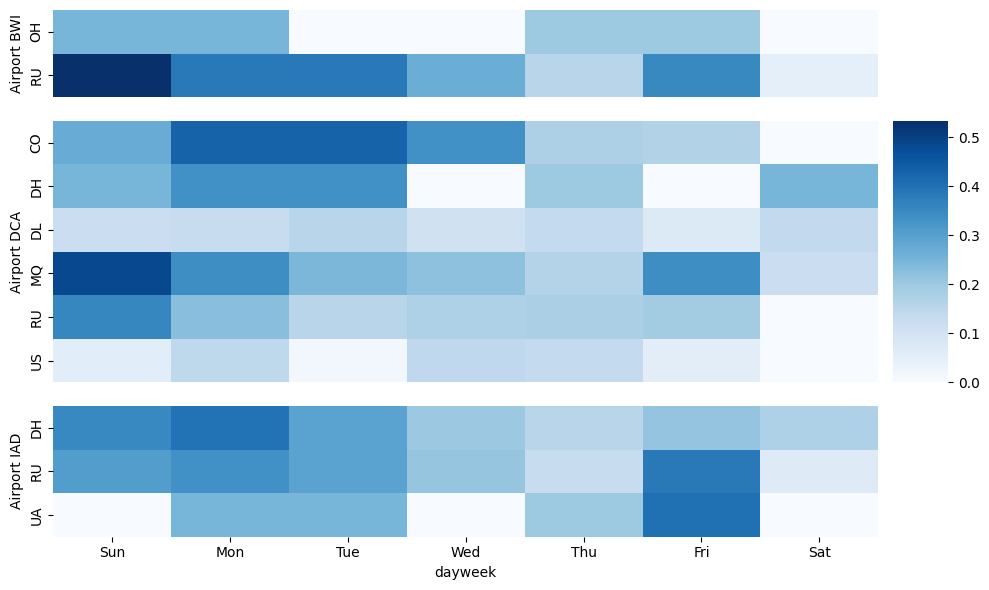

In [88]:
flight_delays_df = pd.read_csv('FlightDelays.csv')
flight_delays_df['delay'] = [1 if x == 'delayed' else 0 for x in flight_delays_df['delay']]


# Step 1: Data aggregation
# Logic: group raw data by 3 levels and calculate the mean delay for each combination
# This compresses millions of rows into a summary table
agg = flight_delays_df.groupby(['origin', 'dayweek', 'carrier']).delay.mean()
agg = agg.reset_index() # Flatten the index for easier processing later

# Step 2: Dynamic layout calculation
# Logic: Handle "Imbalanced data"
# Some airports have 20 carriers, others have only 3
# We calculate specific height ratios so the charts don't look stretch or squeezed.
height_ratios = []

# sorted(...) ensures airports are processed alphabetically (e.g., JFK, LGA, ORD).
# enumerate(...) provides both the index (i) and the airport name (origin),
# though only 'origin' is required in this loop.

"Syntax: 'sorted' ensures we process airports alphabetically (JFK, LGA, ORD...)"
"'enumerate' provides both the index (i) and the airport name (origin)"
for i, origin in enumerate(sorted(flight_delays_df.origin.unique())):
  # Count the number of unique carriers serving the current airport.
  carriers_for_origin = agg.loc[agg.origin == origin, 'carrier'].nunique()
  # The number of carriers determines the relative height of the subplot row.
  height_ratios.append(carriers_for_origin)


# GridSpec configuration
# - height_ratios: the list of integers calculated above. A row with a ratio of 15 will take up 3x more vertical space than a row with a ratio of 5
# - width_ratios: [15, 1] means the Heatmap column (left) is 15 times  wider than the Colorbar column (right)
gridspec_kw = {
    'height_ratios' : height_ratios,
    'width_ratios'  : [15, 1]
}
"gridspec_kw là chức năng cho phép ta chia chiều cao các cột, chiều rộng các hàng theo ý của mình"
"cùng là một khoảng giá trị nhưng khoảng chia khác nhau, ví dụ, các cột của các khung bên trái, số khoảng được chia là số hãng máy bay ở mỗi sân bay"
fig, axes = plt.subplots(nrows = 3, ncols =2 , figsize= (10, 6), gridspec_kw= gridspec_kw)
"Clean up:  hide axes for the right column "
axes[0, 1].axis('off')
axes[2, 1].axis('off')

# Step 3: Visualization loop (pivot & plot)
# Global scale: find the max delay across ALL airports to  unify the color scale (vmin, vmax)
# This ensures that "Dark blue" means the same delay value in every subplot
maxIsDelayed = agg.delay.max()

for i, origin in enumerate(sorted(flight_delays_df.origin.unique())):
  data = pd.pivot_table(agg[agg.origin == origin], values = 'delay', aggfunc='mean',
                            index = ['carrier'], columns = ['dayweek'], fill_value=0)

  data = data[[7, 1, 2, 3, 4, 5, 6]] # Shift last columns to first
  ax   = sns.heatmap(data, ax = axes[i][0], vmin = 0, vmax = maxIsDelayed,
                     cbar_ax = axes[1][1], cmap="Blues")
  ax.set_xticklabels(['Sun', 'Mon','Tue','Wed', 'Thu', 'Fri', 'Sat'])
  if i != 2:
    ax.xaxis.set_visible(False)
  ax.set_ylabel('Airport ' + origin)

plt.tight_layout() # Add tight_layout for better spacing
plt.show() # Call plt.show() once at the end

**IDEA & APPROACH**

**1. Hierarchical data structure**: The flight data follows a natural hierarchical structure similar to administrative divisions.

- **Level 01 (Top)**: Origin Airport
- **Level 02**: Day of week
- **Level 03 (Granular):** Carrier (Airline)
- *Goal:* To analyze which specific combination of Origin - Day - Carrier produces the highest deley frequencies.

**2. Data Processing Pipeline**: To transform *raw data* into an insightful Heatmap, we follow a strict 3-step pipeline:

- **Step 1 - Aggregation**: Use *groupy* to calculate the statistical mean of delays for every unique combination of the hierarchy mentioned above.

- **Step 2 - Pivoting (Reshaping)**: COnvert the data from *Long Format* (transaction rows) to *Wide format*(matrix).

- *Index*: Carries
- *Columns*: Days of the Week
- *Values*: Average delay

- **Step 3 - Visualization**: Use *Seaborn heatmap* to map the numerical matrix to a color scale, allowing for instant identification of *hotspots* (high delays)

**3. Dynamuc layout optimization**: We face an **Imbalanced data** issue: Major hubs (e.g., JFK) have many carriers, while local airports (e.g., ISP) have very few. Using a static/equal layout would result in distorted charts.

- *Solution*: We dynamiccally calculate the *height_ratios* for each subplot based on the number of unique carriers operating at that specific airport. This ensures the visualization is aesthetically balanced and readable.


From Figure 10.4, we see that Sundays and Mondays saw the largest proportion of delays. Delay rates also seem to differ by carrier, by time of day, as well as by origin and destination airports. For weather, we see a strong distinction between delays when Weather = 1 (in that case there is always a delay) and Weather =0. The heatmap in Figure 10.5 reveals some specific combinations with high rates of delays, such as Sunday flights by carrier RU, departing from BWI, or Sunday flights by MQ departing from DCA. We can also see combinations with very low delay rates.